In [66]:
import numpy as np 
import pandas as pd
import sympy
import matplotlib . pyplot as plt
import sys
##from scipy import fftpack
##from scipy.fftpack import fft
##from scipy import signal
##from scipy.fft import fftshift
import xlsxwriter

In [67]:
df = pd.read_csv('Trial_117.csv')

In [68]:
df

,t,g
0,0.00000,0.062773
1,0.00005,-0.030545
2,0.00010,0.009981
3,0.00015,0.015032
4,0.00020,0.000962
...,...,...
585979,29.29895,0.011064
585980,29.29900,-0.013709
585981,29.29905,0.056640
585982,29.29910,0.049425


In [69]:
t = df.iloc[:,:1].values
g = df.iloc[:,-1].values
print (t)
print (g)
print (t.size)

[[0.000000e+00]
 [5.000000e-05]
 [1.000000e-04]
 ...
 [2.929905e+01]
 [2.929910e+01]
 [2.929915e+01]]
[ 0.06277338 -0.0305449   0.00998121 ...  0.05664035  0.04942502
 -0.04509582]
585984


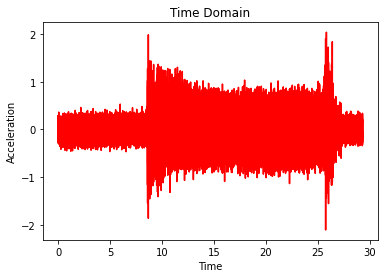

In [70]:
plt.plot(t,g,color='red')
plt.title('Time Domain')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show ()

C:\Users\abulf\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


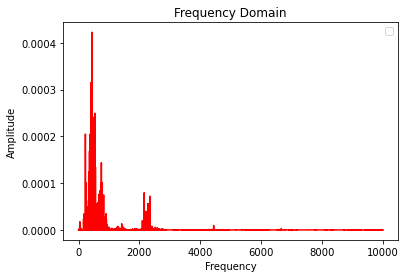

In [71]:
# sampling rate
sr = 20000
# sampling interval
#X = fft(t)
n = len(t)
fhat = np.fft.fft(g,n)
#power spectral density
psd = (fhat/n)*(np.conj(fhat/n))
freq = (sr/n)*(np.arange(n))
freq.resize(585984,1)
L = np.arange (1,np.floor(n/2),dtype='int')



plt.plot(freq[L],psd[L],color='red')
plt.title('Frequency Domain')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

plt.show ()

In [72]:
indices= psd > .0001
psdclean = psd*indices
fhat = indices*fhat
ffilt = np.fft.ifft(fhat)
X= ffilt.real
Y= ffilt.imag
Z= X-Y




No handles with labels found to put in legend.


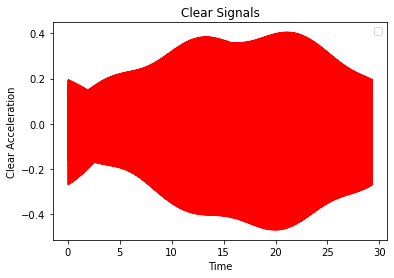

In [76]:
plt.plot(t,Z,color='red')
plt.title('Clear Signals')
plt.xlabel('Time')
plt.ylabel('Clear Acceleration')
plt.legend()

plt.show ()

In [74]:
print (t)
print (t.size)
print (Z)
print (t.size)

[[0.000000e+00]
 [5.000000e-05]
 [1.000000e-04]
 ...
 [2.929905e+01]
 [2.929910e+01]
 [2.929915e+01]]
585984
[0.04950874 0.0410544  0.02983553 ... 0.0566274  0.05731294 0.05495903]
585984


In [75]:
frquency_data = pd.DataFrame(t,Z)
frquency_data.to_excel("frequency_value_117A.xlsx")